# Working with images
A very large portion of your image analysis workflow will be uploading and downloading your images across a plethora of libraries and applications.
With that said, understanding how computer image files work along with how packages display and understand image files is critical.


## What is a digital image?
A digital image is a large grid of picture elements, commonly referred to as pixels, that each have a finite range of values to dictate its intensity. 





## How do colors work?
Colored images are made by stacking multiple digital images on top of eachother. Each layer/digital image represents an individual color. 
For example, RGB images layer 3 identical images on top of another that differ in color: red, green, blue.
It is up to the application/library to determine what each individual layer's color is.


# How images are displayed
With images being made up of enormous amounts of data, there are countless different image file formats that attempt to store said data. Each format comes with its own caveats and focus; some attempt to preserve data while some focus on making the smallest file possible. With that said, popular formats include JPEG, GIF, PNG, and TIFF. Look at the wikipedia list to see just how many there are https://en.wikipedia.org/wiki/Image_file_format

With such a wide variety of formats, working with satellite images becomes a nightmare as they use very nuanced formats such as TIFF or JPG200 that can't even be displayed without applications such as QGIS and are often very large. 
In this notebook, we will be using a JPG2000 satellite image which is unsupported compared to the industry standard format of TIFF. Learning how to work around and understand problems like these are critical in speeding up your workflow.



## What we will use
Throughout most of the outline extraction notebooks you will get an understanding of the skimage functions that help users display and save images.
It's important to highlight that skimage, matplotlib, and numpy work very well with each other and usually have specific functions tailored to each other.




In [3]:
import sys
!conda install --yes --prefix {sys.prefix} scikit-image

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\chloe\Desktop\ASSIPsummer\Github\satellite-image-analysis\notebooks>if "" == "1" (
set SSL_CERT_FILE=  
 set __CONDA_OPENSLL_CERT_FILE_SET= 
) 

C:\Users\chloe\Desktop\ASSIPsummer\Github\satellite-image-analysis\notebooks>if "" == "" (
set SSL_CERT_FILE=C:\Users\chloe\anaconda3\envs\siaa\Library\ssl\cacert.pem  
 set __CONDA_OPENSLL_CERT_FILE_SET="1" 
) 


In [2]:
import os
import matplotlib.pyplot as plt
import skimage
from skimage import io
import numpy as np

Before we run a function to display an image, we have to figure out where your computer is even looking.
the following function conveniently returns the current directory.

In [2]:
#os.getcwd()

'C:\\Users\\chloe\\Desktop\\ASSIPsummer\\Github\\satellite-image-analysis\\notebooks'

To display an image with skimage, you must set the image to a variable with io.imread. This allows you to use the display functions called io.imshow and show.
However, keep in mind this is a JPG2000, try running the following code needed to display an image. 

In [11]:
## Load the JP2 image using skimage
#image_folder = os.getcwd() + '\\images'
#image_path = os.path.join(image_folder, 'demo.jp2')
#images = io.imread(image_path)

## Display the JP2 image using matplotlib
#plt.imshow(image)
#plt.axis('off')  # Turn off axis labels and ticks
#plt.show()

As you can see, skimage cannot directly display our JPG2000 image. At this point, it is vital to understand efficient workarounds. 
We can use rasterio, a package that can easily read and write many different types of files. WIth this, we can display and save our image into a format skimage can read.  


In [3]:
import rasterio

In [4]:
path=os.getcwd() +'\\images'
demo=os.path.join(path, 'demo.jp2')
demo

'C:\\Users\\chloe\\Desktop\\ASSIPsummer\\Github\\satellite-image-analysis\\notebooks\\images\\demo.jp2'

Here, we have our directory that leads to our demo image. In the following code, we use rasterio.open to set each layer of the digital image to a corresponding color in the form of an array. Then we use np.stack to layer them to make a RGB colored image.



In [5]:
with rasterio.open(demo) as src:  # jp2 image
    red = src.read(1, masked=True)
    green = src.read(2, masked=True)
    blue = src.read(3, masked=True)


image = np.stack([red, green, blue])  # Restacking channels


In [6]:
np.shape(image)

(3, 300, 300)

As you can see, the shape of the stack is 3x300x300. In other words, RGB, x pixels, Y pixels. 
This poses an issue as all applications read the image as X pixels, Y pixels, Color bands. This means our next step has to reorder the dimensions so it can be displayed.
If we set axis=-1 it will simply reverse the axis, returning the order we want. 




In [7]:
image = np.stack([red, green, blue], axis=-1)  # Restacking channels
np.shape(image)

(300, 300, 3)

now to display the image

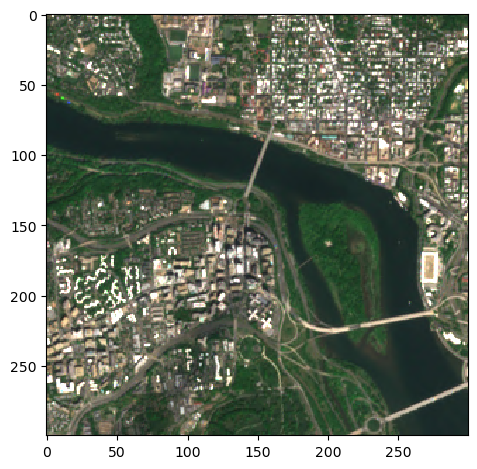

In [8]:

io.imshow(image)
io.show()

There, we have now managed to display our image with skimage by translating it to a numpy array. 
Another just as important step is learning how to download said images. 




# Downloading images
when working wiht sattlite images, you will spend a large portion downlaoding your images to display them on other applications. 

In [9]:
output_filename = 'output_image.tiff'  # Specify the desired output filename and format

io.imsave(output_filename, image)

print(f"Image saved as {output_filename}")

Image saved as output_image.tiff


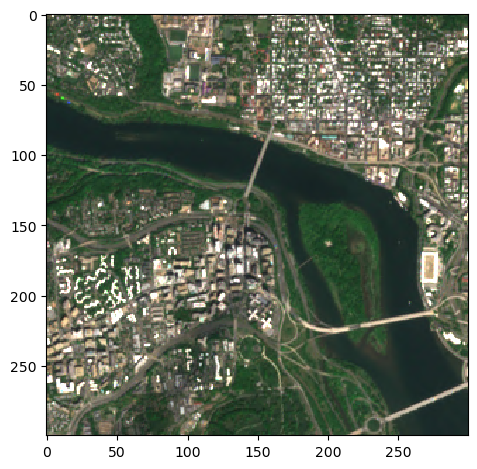

In [10]:
pic = io.imread('output_image.tiff') # Specify file format (skimage can read .TIFF)
io.imshow(pic)
io.show()



https://en.wikipedia.org/wiki/Image_file_format
https://scikit-image.org

